# Polyhedra

In [1]:
%matplotlib widget
from matplotlib.pyplot import close,subplot, subplots
import networkx, mip
from ipyshow.polyhedra import draw, min_edge_colouring, min_path_cover, min_thread_colouring, polyhedron, RegularPolyhedra, Multipath

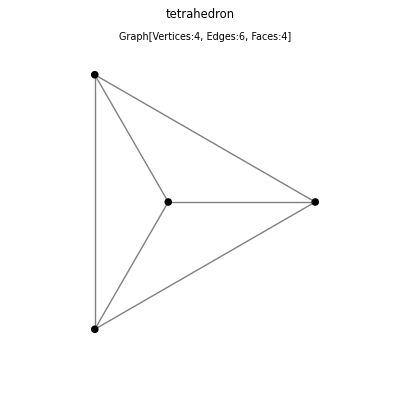

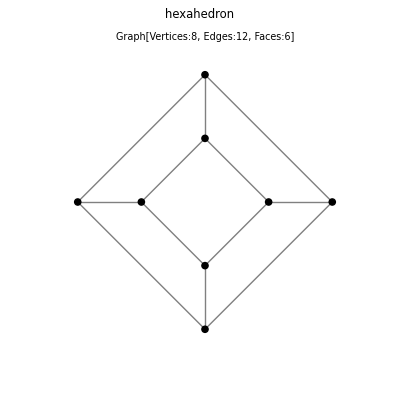

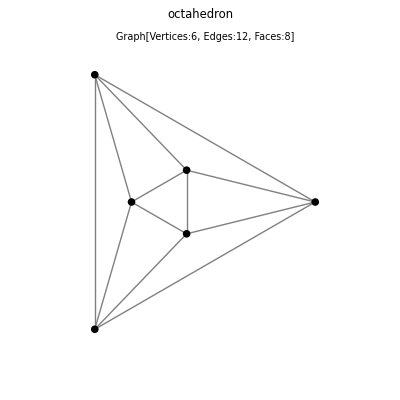

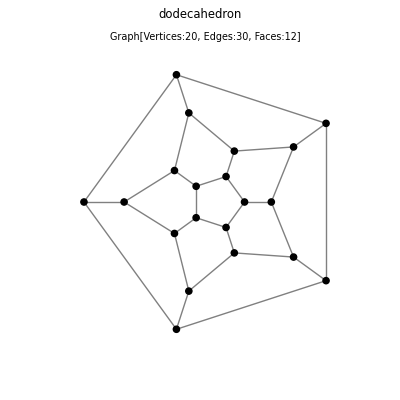

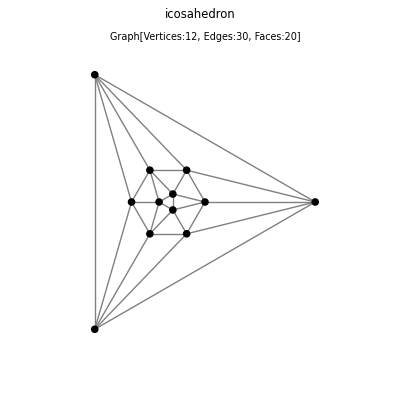

In [2]:
close('all')
for Q in RegularPolyhedra:
  G = polyhedron(Q)
  draw(G,width=1)

## Tetrahedron

### Minimum edge colouring
The minimum number of colours is $3$.

Symmetry breaking ($1$ solution): for a given vertice, the colours of the edges adjacent to it are $012$.

### Minimum path cover
The minimum number of paths is $2$.

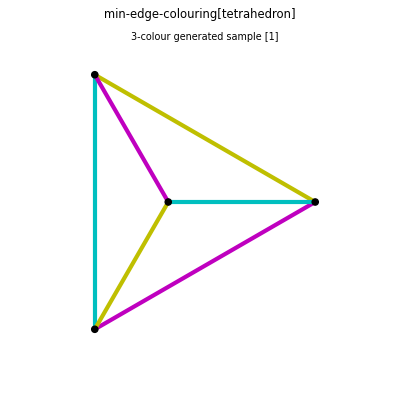

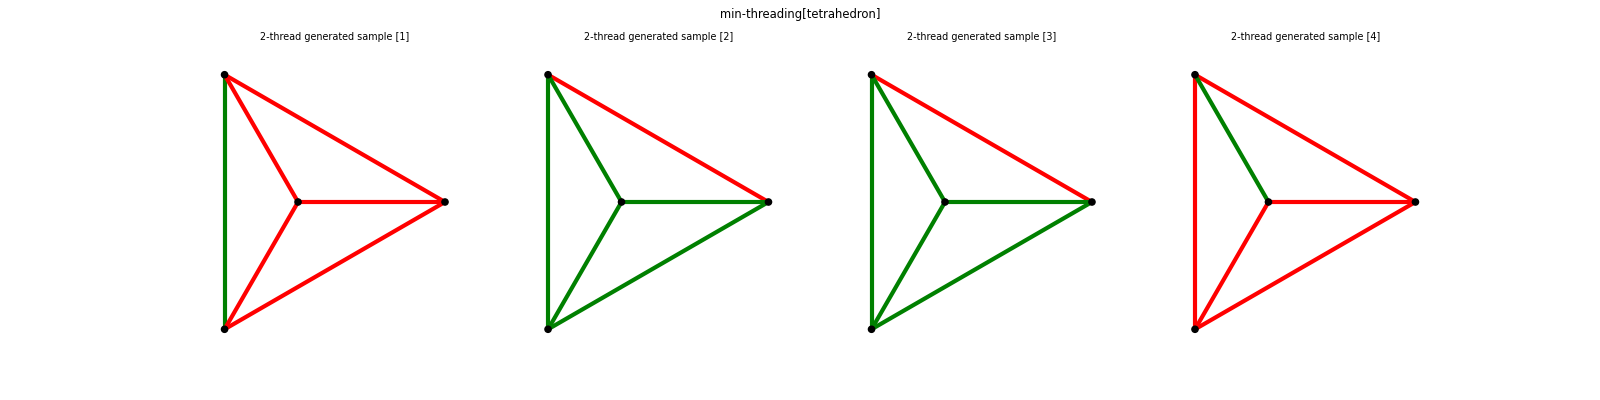

In [3]:
close('all')
G = min_edge_colouring(polyhedron(4),*(('O',('a',k),k) for k in range(3)))
draw(G,E_COLOURS=enumerate('cmy'))
G = min_thread_colouring(polyhedron(4))
draw(G)

## Hexahedron (Cube)

### Minimum edge colouring
The minimum number of colours is $3$.

Symmetry breaking ($3$ solutions): for a given face, the colours of 3 of its consecutive edges are $010$.

Indeed, let $e_{1:4}$ be 4 consecutive edges of a square face, enumerated in a given orientation of the surface starting at an arbitrary edge. Let A,B be the colours of $e_1,e_2$, and let C be the 3-rd colour. The sequence of colours of the edges $e_{1:4}$ can only be one of the following:

|                   |ABAX.|A.BCB|
|-------------------| --- | --- |
|=(modulo cyclicity)|ABAX |BCBA |

Hence, they all conform to the pattern ABAX modulo permutation of the colours ABC.

### Minimum path cover
The minimum number of paths is $4$.

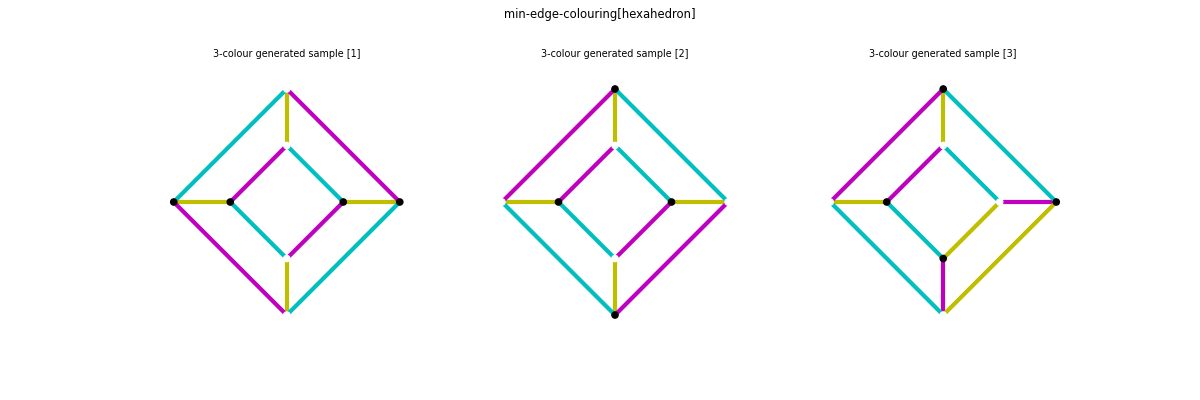

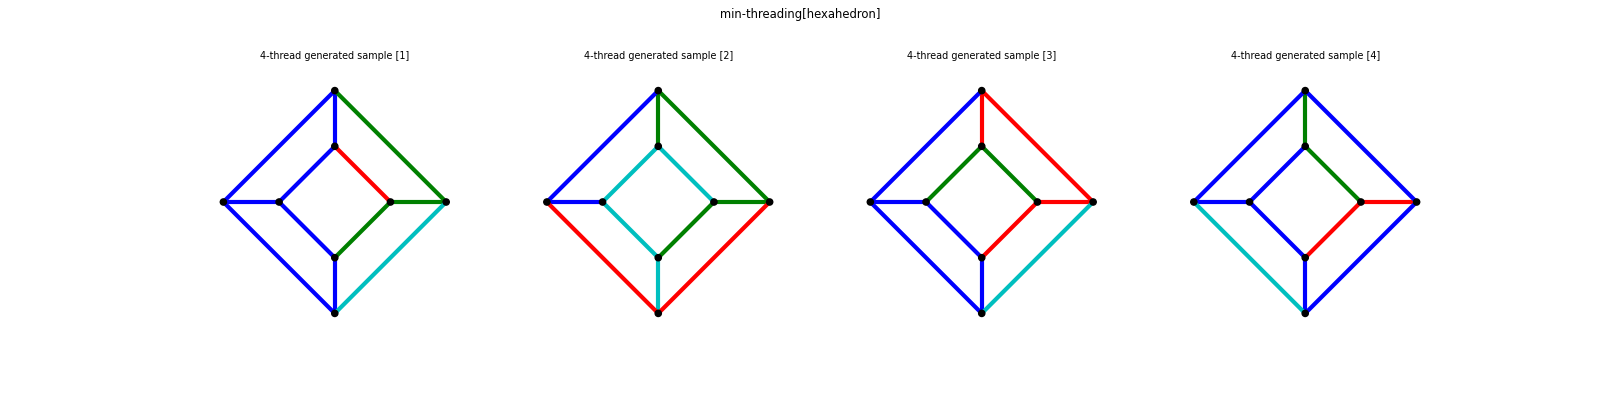

In [4]:
close('all')
G = min_edge_colouring(polyhedron(6),*((('a',k),('a',k+1),k%2) for k in range(3)))
draw(G,E_COLOURS=enumerate('cmy'))
G = min_thread_colouring(polyhedron(6))
draw(G)

## Octahedron

### Minimum edge colouring
The minimum number of colours is $4$.

Symmetry breaking (2 solutions): for a given face, the colours of its consecutive edges are $012$.

### Minimum path cover
The minimum number of paths is $0$ (i.e. the graph is a single loop).

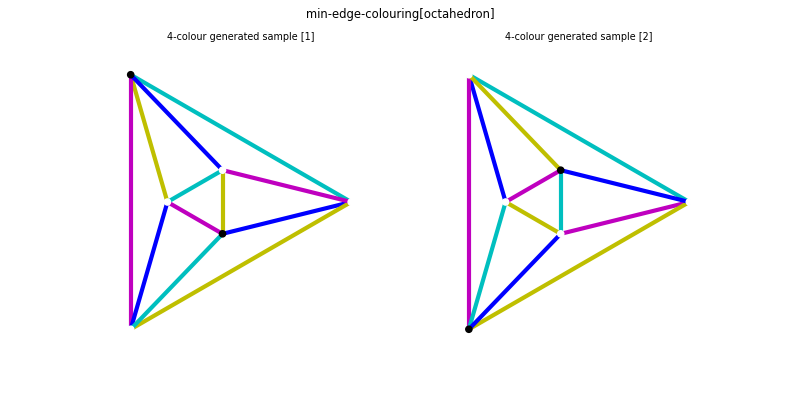

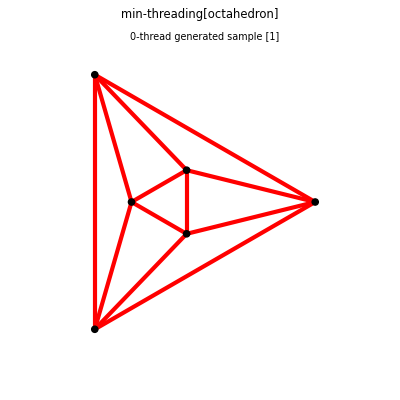

In [5]:
close('all')
G = min_edge_colouring(polyhedron(8),*((('a',k),('a',(k+1)%3),k) for k in range(3)))
draw(G,E_COLOURS=enumerate('cmyb'))
G = min_thread_colouring(polyhedron(8))
draw(G)

## Dodecahedron

### Minimum edge colouring
The minimum number of colours is $3$.

Symmetry breaking (2 solutions): for a given face, the colours of its consecutive edges are $01012$.

Indeed, let $e_{1:5}$ be the edges of a pentagonal face, enumerated in a given orientation of the surface starting at an arbitrary edge. Let A,B be the colours of $e_1,e_2$, and let C be the 3-rd colour. The sequence of colours of the edges $e_{1:5}$ can only be one of the following:

|                   |ABABC.|ABAC.B|ABC.AB|AB.CAC|A.BCBC|
|-------------------| ---  | ---  | ---  | ---  | ---  |
|=(modulo cyclicity)|ABABC |BABAC |ABABC |CACAB |BCBCA |

Hence, they all conform to the pattern ABABC modulo permutation of the colours ABC.

### Minimum path cover
The minimum number of paths is $10$.

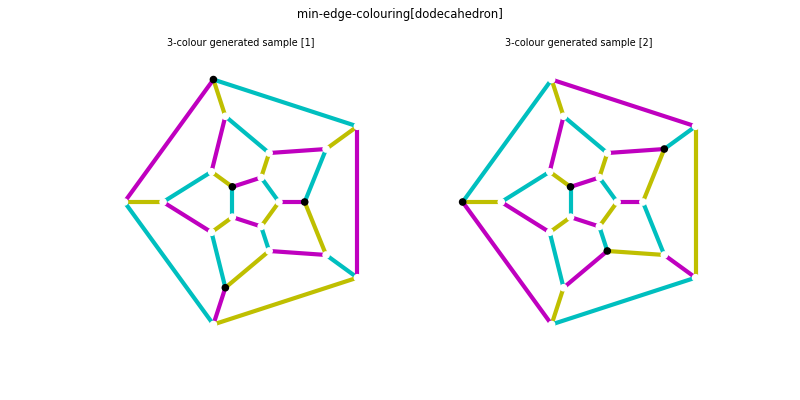

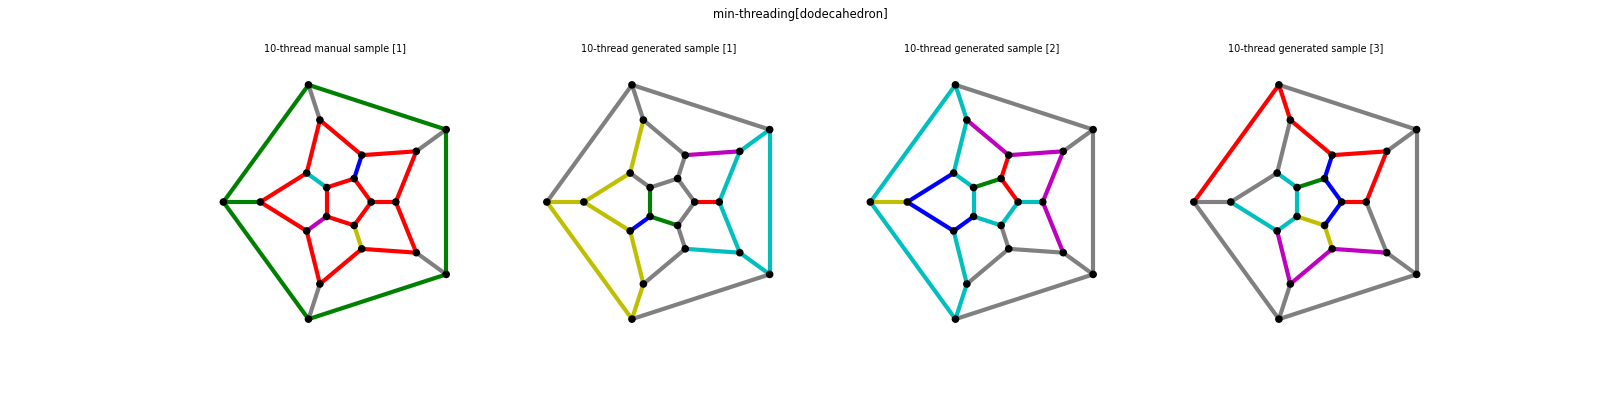

In [6]:
close('all')
G = min_edge_colouring(polyhedron(12),*((('a',k),('a',k+1),k%2) for k in range(4)))
draw(G,E_COLOURS=enumerate('cmy'))
def manual_sol():
  mp = Multipath()
  mp.add_n(*(('a',k) for k in range(5)),('a',0),*((('b_' if k%2 else 'b'),(3*k)%5) for k in range(10)),('b',0))
  mp.add_n(*(('a_',k) for k in range(5)),('a_',0),('b_',0))
  for k in range(1,5): mp.add_n(('a',k),('b',k))
  for k in range(1,5): mp.add_n(('a_',k),('b_',k))
  assert len(mp.paths) == 10
  yield mp
G = min_thread_colouring(polyhedron(12),manual_sol())
draw(G)

## Icosahedron
### Minimum edge colouring of the icosahedron
The minimum number of colours is $5$. No obvious symmetry breaking.
### Minimum path cover of the icosahedron
The minimum number of paths is $6$.

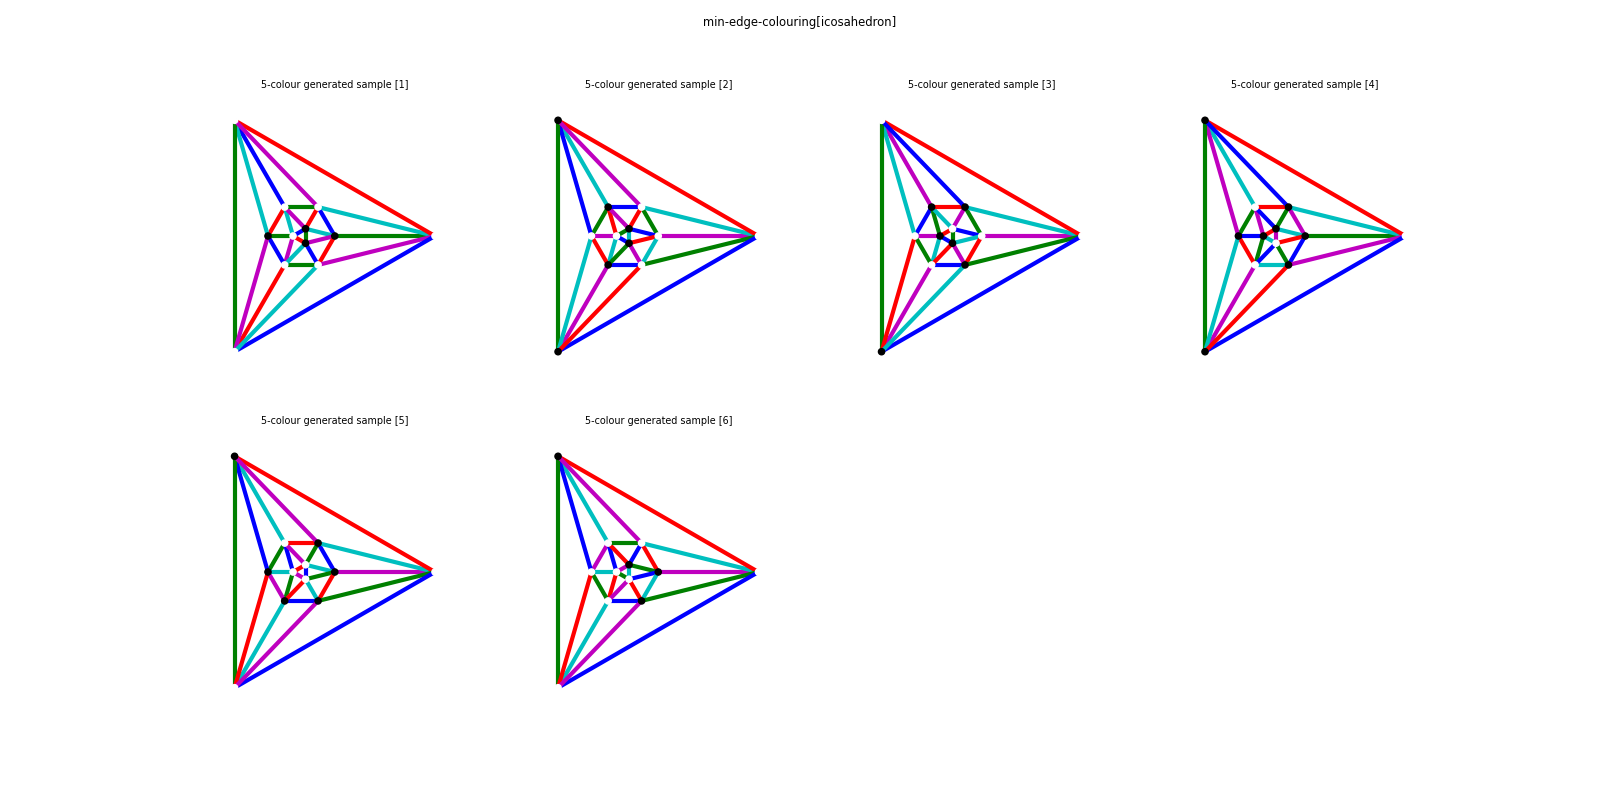

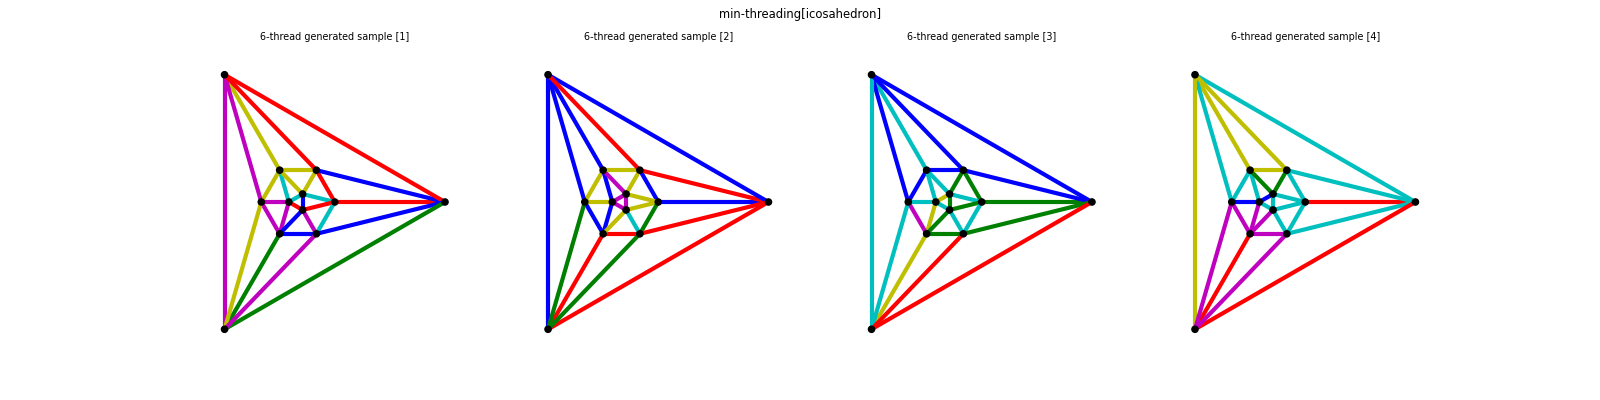

In [7]:
close('all')
G = min_edge_colouring(polyhedron(20),(('b',0),('a_',2),3),*((('b',k),('b',(k+1)%3),k) for k in range(3)),nsol=6)
draw(G)
G = min_thread_colouring(polyhedron(20))
draw(G)